# Related to Figure4A

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_group = pd.read_csv('/data/yuchen_data/Stereo_seq/All_Figures/version2/Figure4/1.data/cluster_rst.txt', index_col=0, sep='\t')
df_value = pd.read_csv('/data/yuchen_data/Stereo_seq/All_Figures/version2/Figure4/1.data/scale.matrix.txt', index_col=0, sep='\t')

In [3]:
df_group

,EndRes_pvalue,EndRes_logFC1_2,PatternRes_pvalue,PatternRes_fcMedian,EarlyRes_pvalue,EarlyRes_fcMedian,Cluster_label,Group
HOXC4,7.027816e-01,-0.622068,2.095944e-02,1.344755,NaN,2.943216,39,NaN
PGGHG,1.866084e-03,-1.650435,1.819274e-02,0.460451,0.242189,0.451469,10,NaN
HPF1,1.163513e-01,1.185033,2.090560e-02,0.676901,0.169249,0.705618,63,1.0
RGS14,2.266154e-04,-2.183845,2.179079e-03,0.432613,0.404593,0.377645,10,NaN
JAML,3.978891e-01,-0.923390,6.069918e-10,0.982245,0.076097,0.414466,1,NaN
...,...,...,...,...,...,...,...,...
DAB2,1.219146e-01,-1.637189,1.757185e-02,0.510584,0.964899,0.031348,61,NaN
DLEC1,3.917282e-03,-4.101218,1.470567e-02,0.647386,0.470185,0.507216,50,2.0
SQSTM1,3.543433e-09,-1.091844,5.206956e-10,0.301059,0.056024,0.183668,3,2.0
TMBIM6,2.272794e-02,-0.638622,9.226822e-02,0.113027,0.054530,0.233213,8,2.0


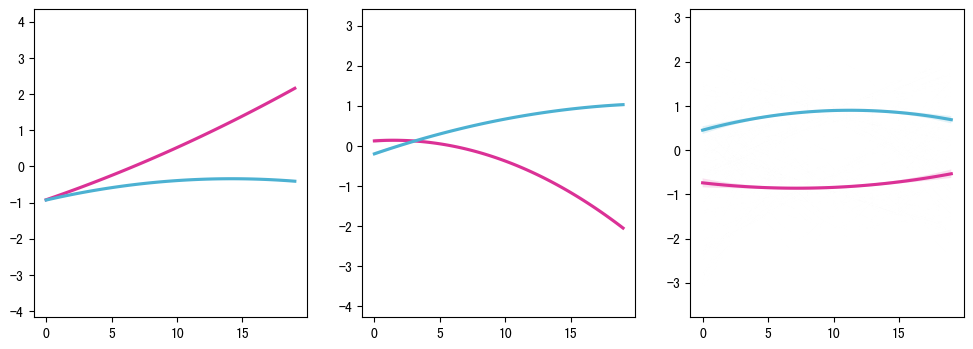

In [4]:
def get_fit(group):
    df_plot_1 = df_value.loc[plot_genes, df_value.columns.str.startswith(group)]
    all_y = df_plot_1.values.flatten()
    all_x = list(range(20)) * df_plot_1.shape[0]
    df_plot_1_cur = pd.DataFrame(index=range(len(all_x)))
    df_plot_1_cur['x'] = all_x
    df_plot_1_cur['y'] = all_y
    return df_plot_1_cur


dic_alpha = {1: 0.03, 2:0.03, 3: 0.1}

fig, axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)
for idx in range(3):
    ax = axes[idx]
    group = idx + 1
    alpha = dic_alpha[group]
    plot_genes = df_group[df_group['Group'] == group].index
    for gene in plot_genes:
        v1 = df_value.loc[gene, df_value.columns.str.startswith('l1')]
        v2 = df_value.loc[gene, df_value.columns.str.startswith('l2')]
        ax.plot(range(len(v1)), v1, c='#db3196', linewidth=0.01, alpha=alpha)
        ax.plot(range(len(v2)), v2, c='#4cb1d2', linewidth=0.01, alpha=alpha)

    df_plot_mature = get_fit('l1')
    sns.regplot(data=df_plot_mature, x='x', y='y', scatter=False, ax=ax, order=2, color='#db3196')

    df_plot_immature = get_fit('l2')
    sns.regplot(data=df_plot_immature, x='x', y='y', scatter=False, ax=ax, order=2, color='#4cb1d2')

    ax.set_xlabel('')
    ax.set_ylabel('')
plt.show()


In [5]:
df_value

,l1.t0,l1.t36.9730074112519,l1.t73.9460148225038,l1.t110.919022233756,l1.t147.892029645008,l1.t184.865037056259,l1.t221.838044467511,l1.t258.811051878763,l1.t295.784059290015,l1.t332.757066701267,...,l2.t262.610153330306,l2.t288.871168663337,l2.t315.132183996368,l2.t341.393199329398,l2.t367.654214662429,l2.t393.915229995459,l2.t420.17624532849,l2.t446.437260661521,l2.t472.698275994551,l2.t498.959291327582
HOXC4,0.370047,0.391124,0.412200,0.433274,0.454343,0.475400,0.496444,0.517479,0.538509,0.559536,...,-0.471774,-0.275168,-0.078562,0.118042,0.314646,0.511249,0.707851,0.904454,1.101056,1.297658
PGGHG,-0.298636,-0.196593,-0.098662,-0.008853,0.070640,0.138089,0.184508,0.198447,0.176371,0.121025,...,0.414161,0.620786,0.830367,1.042511,1.256824,1.472912,1.690381,1.908838,2.127889,2.347141
HPF1,-0.342525,-0.376868,-0.394295,-0.377651,-0.305554,-0.159068,0.040461,0.256414,0.469864,0.675933,...,-0.058746,-0.051192,-0.074258,-0.123478,-0.194384,-0.282512,-0.383395,-0.492567,-0.605562,-0.717914
RGS14,-0.149399,-0.102424,-0.053070,0.001098,0.063547,0.135435,0.196803,0.220206,0.195359,0.125591,...,0.505590,0.683689,0.863109,1.043840,1.225872,1.409193,1.593794,1.779663,1.966789,2.155163
JAML,-0.563714,-0.236708,0.082283,0.383105,0.617268,0.714151,0.675012,0.530451,0.306584,0.025905,...,1.209147,1.075945,0.905359,0.702784,0.473612,0.223236,-0.042951,-0.319556,-0.601186,-0.882448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAB2,-0.269814,0.094145,0.438466,0.741780,0.951678,1.002991,0.922877,0.774266,0.587650,0.367740,...,0.865437,0.753041,0.613942,0.452804,0.274290,0.083065,-0.116207,-0.318863,-0.520238,-0.715669
DLEC1,1.223922,0.949771,0.684537,0.437621,0.227093,0.073576,-0.034759,-0.122456,-0.205247,-0.291848,...,0.200711,0.323457,0.464501,0.620489,0.788066,0.963878,1.144571,1.326789,1.507179,1.682385
SQSTM1,-0.193679,-0.206610,-0.217372,-0.224008,-0.228314,-0.235389,-0.250762,-0.279841,-0.324103,-0.381906,...,0.608719,0.799969,0.994427,1.191860,1.392035,1.594719,1.799678,2.006681,2.215494,2.425883
TMBIM6,-2.866495,-1.838586,-0.906537,-0.166502,0.280136,0.360784,0.223076,0.094866,0.059300,0.084695,...,0.426133,0.547190,0.670982,0.799670,0.935415,1.080380,1.236725,1.406612,1.592202,1.795657


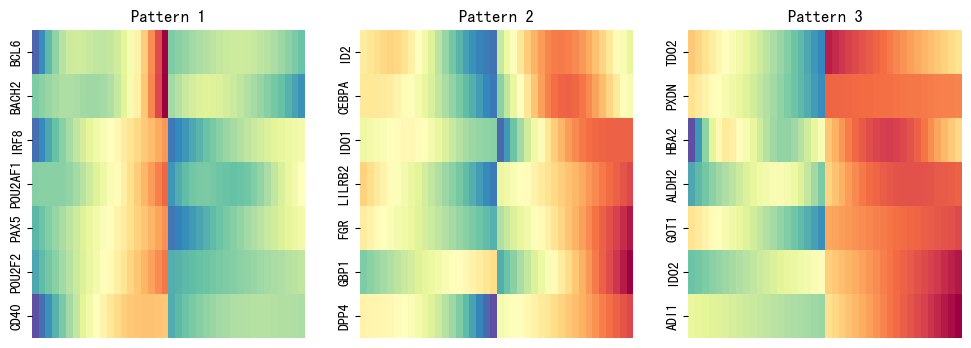

In [6]:

fig, axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)

# pattern1
ax1 = axes[0]
plot_genes = ['BCL6', 'BACH2', 'IRF8', 'POU2AF1', 'PAX5', 'POU2F2', 'CD40']
df_plot = df_value.reindex(plot_genes)
sns.heatmap(df_plot, cmap='Spectral_r', cbar=False, ax=ax1)
ax1.set_xticks([])
ax1.set_title('Pattern 1')

ax2 = axes[1]
# plot_genes = ['IDO1', 'LILRB2', 'ID2', 'SDC4', 'NDFIP1', 'SOCS6', 'ANXA1']
plot_genes = ['ID2', 'CEBPA', 'IDO1', 'LILRB2', 'FGR', 'GBP1', 'DPP4']
# 'CEBPA', 'ID2', 'LILRB2', 'FGR', 'GBP1', 'IDO1', 'DPP4'

df_plot = df_value.reindex(plot_genes)
sns.heatmap(df_plot, cmap='Spectral_r', cbar=False, ax=ax2)
ax2.set_xticks([])
ax2.set_title('Pattern 2')

ax3 = axes[2]
# plot_genes = ['ALDH2', 'CAT', 'HAAO', 'TDO2', 'MAOB', 'ACAT1', 'ELOVL6']
plot_genes = ['TDO2', 'PXDN','HBA2',  'ALDH2', 'GOT1', 'IDO2', 'ADI1']
# ALDH2 ACAT1 IDO2 GOT1 HBA2 PXDN APOA4
df_plot = df_value.reindex(plot_genes)
sns.heatmap(df_plot, cmap='Spectral_r', cbar=False, ax=ax3)
ax3.set_xticks([])
ax3.set_title('Pattern 3')
plt.show()